Karol Gutiérrez A01024536

# Calculate the Fourier Transform of an image

First we import the dependencies as usual

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

This is the image that we will use.

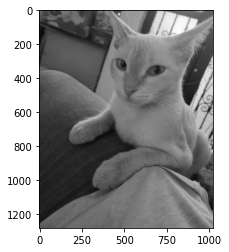

In [2]:
img = cv2.imread("media/cat.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Then we apply the Fourier Transform to the image and plot it

In [3]:
# Fast Fourier transform
ft = np.fft.fft2(img)

To plot the Fourier transform, let's remember that it is composed of complex numbers, then one option is to plot the real and imaginary parts.

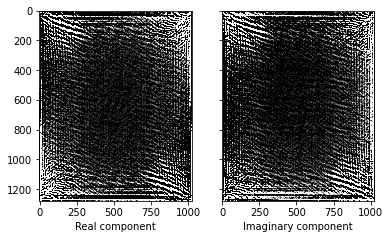

In [4]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')

ax[0].set_xlabel('Real component')
real_ft = np.real(ft)
ax[0].imshow(real_ft, cmap='gray', vmin=0, vmax=255)

ax[1].set_xlabel('Imaginary component')
imag_ft = np.imag(ft)
ax[1].imshow(imag_ft, cmap='gray', vmin=0, vmax=255)

plt.show()

## Can I detect borders using the Fourier Transform?

Yes, we can. The idea is to filter only the parts with high frequencies in the image.

We can use `fftshift` to rearrange a Fourier transform X by shifting the zero-frequency component to the center of the array, and then we can plot it. **With that, all the low frequencies will be near the center of the image.**

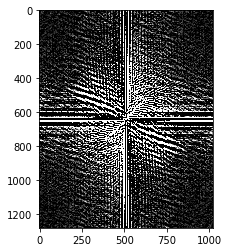

In [5]:
fshift = np.fft.fftshift(ft)
plt.imshow(np.real(fshift), cmap='gray', vmin=0, vmax=255)
plt.show()

Then, we can apply a High Pass Filter (HPF) to get rid of all the low frequencies in the images using a rectangular mask of size `radius * radius` at the center of the image. (We can set different values for the radius)

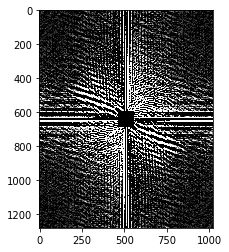

In [6]:
# Get shape of image
nrows, ncols = img.shape

# Get coordinates of radius
cx,cy = int(nrows/2) , int(ncols/2)

# Set radius
radius = 50

# Apply filter
fshift[cx - radius : cx + radius, cy - radius : cy + radius] = 0
plt.imshow(np.real(fshift), cmap='gray', vmin=0, vmax=255)
plt.show()

Now we revert our previous steps by applying inverse shift and then the inverse Fourier Transform.
At the end, **this is the final result.**

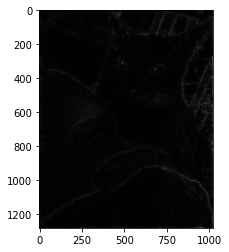

In [7]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Plot result
plt.imshow(img_back, cmap='gray')
plt.show()

# Calculate the Fourier transform of all frames in a video input

The process is exactly the same, and at the end we can generate a video with the Fourier transform and another video with the border detection of the original video.

The original video is here: https://youtu.be/zaMZZ77nafg

Here we load the video and get its size:

In [8]:
video = cv2.VideoCapture('media/cars.mp4')

frame_width = int(video.get(3)) 
frame_height = int(video.get(4)) 
   
size = (frame_width, frame_height) 

Next we define the name of the output file.

In [9]:
result = cv2.VideoWriter('cars_edges.avi', cv2.VideoWriter_fourcc(*'MJPG'), 30, size)

Finally, we just copy the same implementation as above and apply the Fourier transform to each frame. To save the frame we need to convert it back to RGB.

In [10]:
while(True): 
    ret, frame = video.read() 
    if ret == True:  
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ft = np.fft.fft2(img)
        fshift = np.fft.fftshift(ft)
        nrows, ncols = img.shape
        cx,cy = int(nrows/2) , int(ncols/2)
        radius = 30
        fshift[cx - radius : cx + radius, cy - radius : cy + radius] = 0
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        img_back = np.floor(img_back).astype('uint8')
        bb = cv2.cvtColor(img_back,cv2.COLOR_GRAY2RGB)
        result.write(bb) 
    else: 
        break  
video.release()
result.release() 

print("The video was successfully saved") 

The video was successfully saved


Here we can see the result: https://youtu.be/-vZH0SCMMxY

# Explain what is happening

Using Fourier transforms we can identify the frequencies of an image and then use some transformations to group and filter low or high frequencies. This technique allows us to identify those places in the image with high frequencies and in most cases this corresponds to the edges of the different elements of the image.